<a href="https://colab.research.google.com/github/Prahalpm/Airbnb_Booking_Analysis_Capstone_Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?id=1DrG4SKCftmzNV0XAtgZPzefGjea8yZER)

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
1. What can we learn about different hosts and areas?
    * 1.1 Which Hosts are the most listed ? <br>
    * 1.2 Which Host is the most popular in particular area on basis of host id ? <br>
    * 1.3 Count of room type with respect to neighbourhood group. <br>
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
    * 2.1 Which Neighbourhood group is the most costly? <br>
    * 2.2 Neighbourhood with the most reviews <br> 
3. Which hosts are the busiest and why? <br>
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it? <br>
5. Neighbourhood price band? maximum and minimum values of each place. <br>
6. Price distribution with respect to neighbourhood group. <br>
7. Which room type is most popular and which are occupies the most?<br>



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd "/content/drive/My Drive/Airbnb Capstone Project"

/content/drive/My Drive/Airbnb Capstone Project


In [17]:
!ls

'Airbnb_Bookings_Analysis_Capstone_Project (1).ipynb'   Airbnb.csv   backup


In [18]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv('Airbnb.csv') 
df.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [20]:
df.shape

(48895, 16)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [22]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [23]:
df.drop(['id','name','last_review'], axis=1, inplace=True)

In [24]:
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [25]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
df.fillna({'reviews_per_month':0}, inplace=True)

df.reviews_per_month.isnull().sum()

0

In [27]:
df.head(10)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
10,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6


In [28]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882700e+04,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000,38827.000000
mean,6.424072e+07,40.728128,-73.951152,142.336029,5.868828,29.286836,1.373041,5.165967,114.886651
std,7.589297e+07,0.054988,0.046691,196.981318,17.387730,48.180105,1.680267,26.300973,129.536345
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.033622e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [30]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
Q1, Q3

(69.0, 170.0)

In [31]:
IQR = Q3 - Q1
IQR

101.0

In [32]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-82.5, 321.5)

In [33]:
df[(df.price<lower_limit)|(df.price>upper_limit)]

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
116,115307,Alexandra,Brooklyn,Williamsburg,40.71942,-73.95748,Entire home/apt,325,3,324,3.01,1,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47736,269893009,Ek,Brooklyn,Bay Ridge,40.63294,-74.02730,Entire home/apt,595,1,4,4.00,1,57
47927,270590027,Amanda,Brooklyn,Williamsburg,40.70907,-73.95054,Entire home/apt,599,2,1,1.00,1,346
47950,268449136,Alexandra & William,Manhattan,Chelsea,40.74263,-74.00234,Entire home/apt,800,3,1,1.00,1,345
48118,270292053,Teufik,Manhattan,Chelsea,40.74690,-73.99038,Entire home/apt,350,3,3,3.00,1,345


In [34]:
df_no_outlier = df[(df.price>lower_limit)&(df.price<upper_limit)]
df_no_outlier.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [35]:
df_no_outlier.host_id.nunique()

28723

# **1.What can we learn about different hosts and areas?**

## **1.1 Which Hosts are the most listed ?**

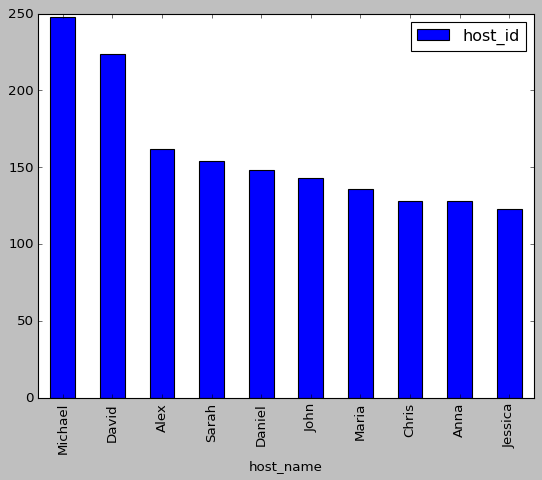

In [54]:
Host_id = df_no_outlier['host_id'].value_counts()[:10]

Most_listed_host = df_no_outlier[['host_name','host_id']].groupby('host_name').nunique('host_id').sort_values('host_id',ascending=False)
Most_listed_host[:10].plot(kind='bar')

## **1.2 Which Host is the most popular in particular area on basis of host id ?** 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4817e6d50>],
      dtype=object)

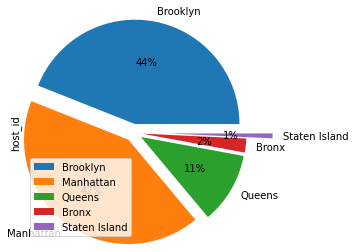

In [37]:
colors = sns.color_palette('pastel')
Popular_host_areawise = df_no_outlier[['host_id','neighbourhood_group']].groupby(['neighbourhood_group']).nunique('host_id').sort_values('host_id',ascending=False)
Popular_host_areawise.plot(kind='pie',subplots=True,radius=1.2,autopct='%.0f%%',explode=[0.1,0.1,0.1,0.1,0.4])

## **1.3 Count of room type with respect to neighbourhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


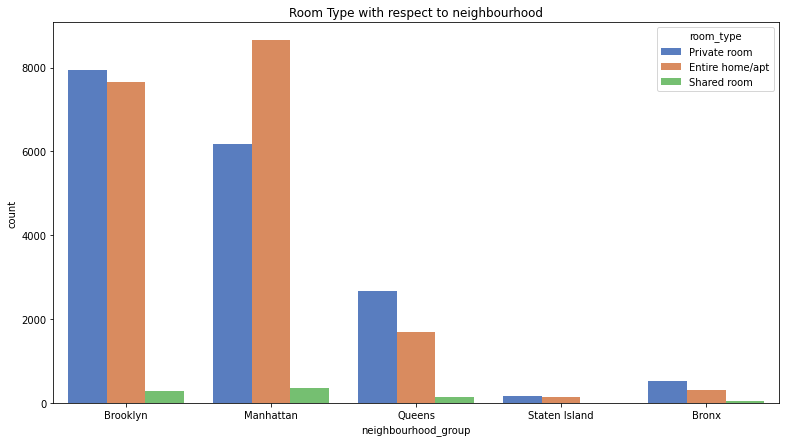

In [38]:
plt.figure(figsize=(13,7))
plt.title("Room Type with respect to neighbourhood")
sns.countplot(df_no_outlier.neighbourhood_group,hue=df_no_outlier.room_type, palette="muted")
plt.show()

# **2. What can we learn from predictions? (ex: locations, prices, reviews, etc.)**

## **2.1 Which Neighbourhood group is the most costly?**

                          price
neighbourhood_group            
Bronx                 74.664352
Brooklyn             105.816271
Manhattan            141.263394
Queens                87.659787
Staten Island         87.163462


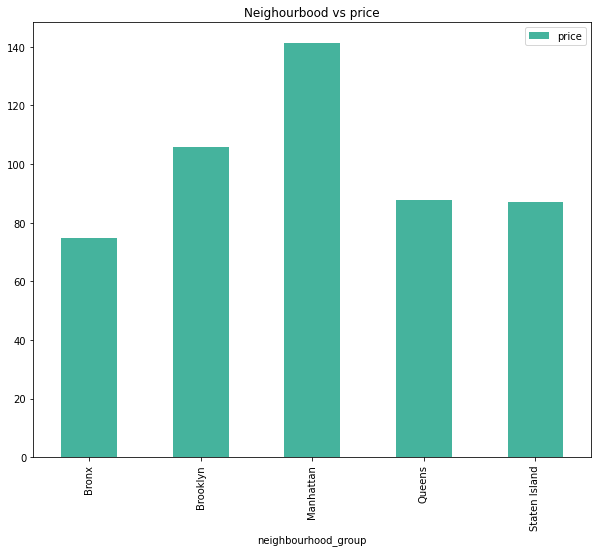

In [39]:
Costliest_neighbourhood = df_no_outlier[['neighbourhood_group','price']].groupby('neighbourhood_group').mean()
print(Costliest_neighbourhood)
Costliest_neighbourhood.plot(kind = 'bar', title = 'Neighourbood vs price',figsize=(10,8), color = '#45B39D')

## **2.2 Neighbourhood with the most reviews**

                     number_of_reviews
neighbourhood_group                   
Bronx                              864
Brooklyn                         15893
Manhattan                        15175
Queens                            4506
Staten Island                      312


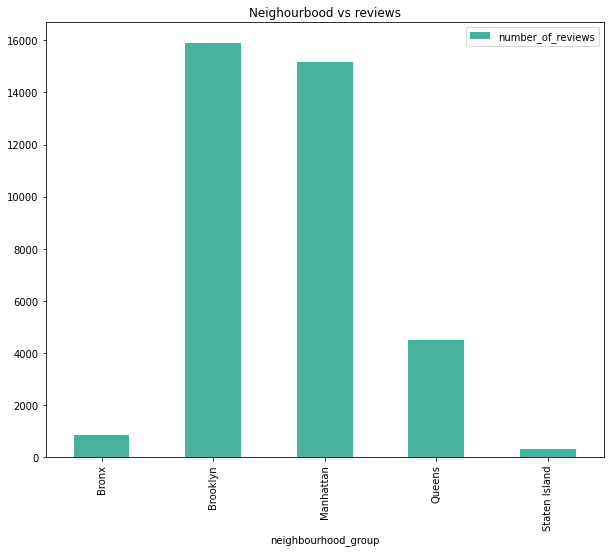

In [40]:
Most_reviewed_neighbours = df_no_outlier[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').count()
print(Most_reviewed_neighbours)
Most_reviewed_neighbours.plot(kind = 'bar', title = 'Neighourbood vs reviews',figsize=(10,8), color = '#45B39D')

# **3. Which hosts are the busiest and why?**

In [41]:
colors = sns.color_palette('pastel')
top_hosts = df_no_outlier[['host_name','host_id','number_of_reviews']].groupby(['host_id','host_name']).sum().sort_values('number_of_reviews',ascending=False)
top_ten_hosts = top_hosts[:10]
top_ten_hosts
#Busiest host based on no of reviews

,,number_of_reviews
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
4734398,Jj,1798
16677326,Alex And Zeena,1355
6885157,Randy,1346
23591164,Angela,1269


Text(0, 0.5, 'Number of reviews')

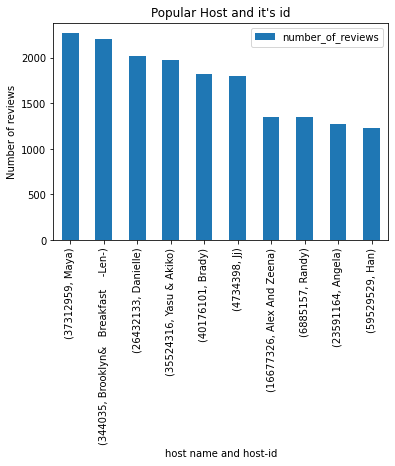

In [42]:
top_ten_hosts.plot(kind='bar')
plt.title("Popular Host and it's id")
plt.xlabel("host name and host-id")
plt.ylabel("Number of reviews")


# **3. Which hosts are the busiest and why?**

In [43]:
colors = sns.color_palette('pastel')
top_hosts = df_no_outlier[['host_name','host_id','number_of_reviews']].groupby(['host_id','host_name']).sum().sort_values('number_of_reviews',ascending=False)
top_ten_hosts = top_hosts[:10]
top_ten_hosts
#Busiest host based on no of reviews

,,number_of_reviews
host_id,host_name,
37312959,Maya,2273
344035,Brooklyn& Breakfast -Len-,2205
26432133,Danielle,2017
35524316,Yasu & Akiko,1971
40176101,Brady,1818
4734398,Jj,1798
16677326,Alex And Zeena,1355
6885157,Randy,1346
23591164,Angela,1269


Text(0, 0.5, 'Number of reviews')

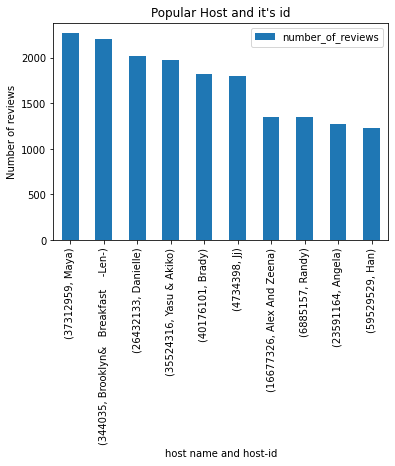

In [44]:
top_ten_hosts.plot(kind='bar')
plt.title("Popular Host and it's id")
plt.xlabel("host name and host-id")
plt.ylabel("Number of reviews")


# **4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

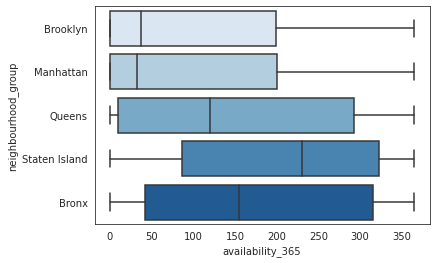

In [45]:
sns.set_style(style='white')
sns.boxplot( y=df_no_outlier["neighbourhood_group"], x=df_no_outlier["availability_365"],palette="Blues" );
plt.show()

# **5. Neighbourhood price band? maximum and minimum values of each place**

In [46]:
h = df_no_outlier.groupby(['neighbourhood_group'])['price']
max_value = h.max()
max_value

neighbourhood_group
Bronx            309
Brooklyn         320
Manhattan        321
Queens           320
Staten Island    300
Name: price, dtype: int64

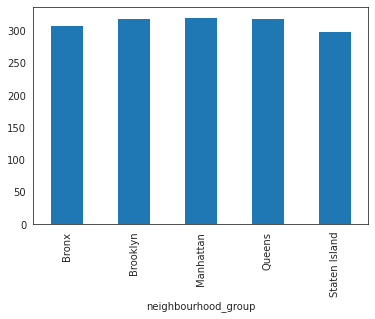

In [47]:
max_value.plot(kind='bar')


In [48]:
min_values = h.min()
min_values

neighbourhood_group
Bronx             0
Brooklyn          0
Manhattan        10
Queens           10
Staten Island    13
Name: price, dtype: int64

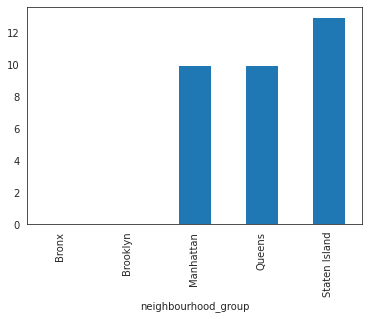

In [49]:
min_values.plot(kind='bar')


In [50]:
price_band = h.max() - h.min()
price_band

neighbourhood_group
Bronx            309
Brooklyn         320
Manhattan        311
Queens           310
Staten Island    287
Name: price, dtype: int64

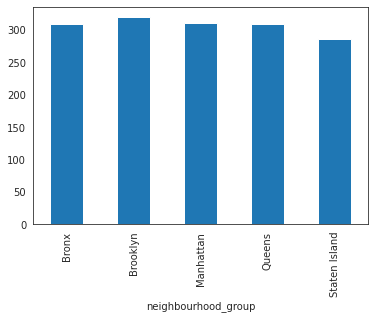

In [51]:
price_band.plot(kind='bar')

# **6. Price distribution with respect to neighbourhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


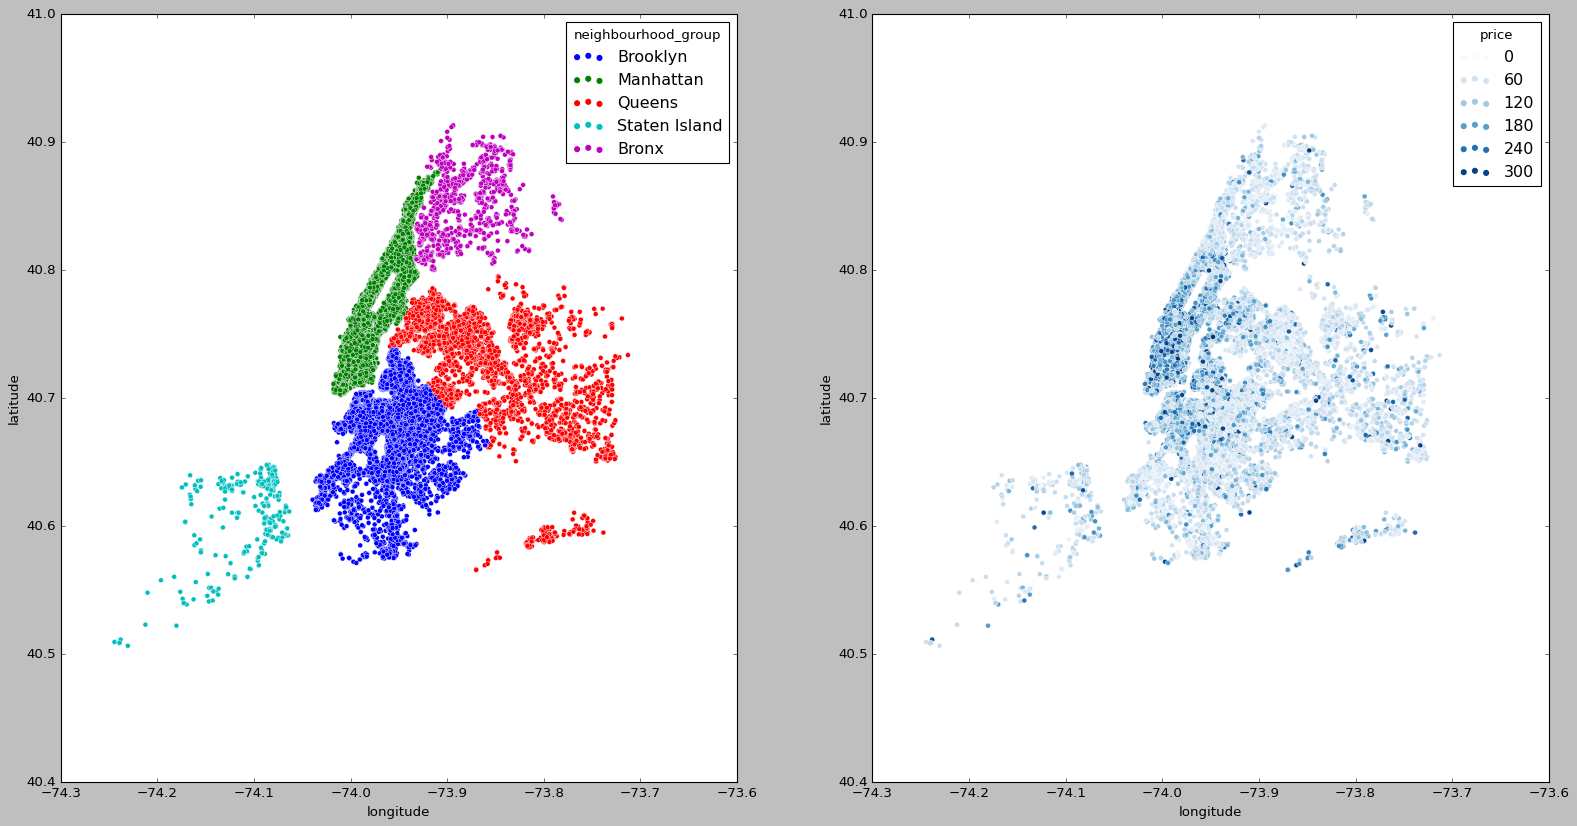

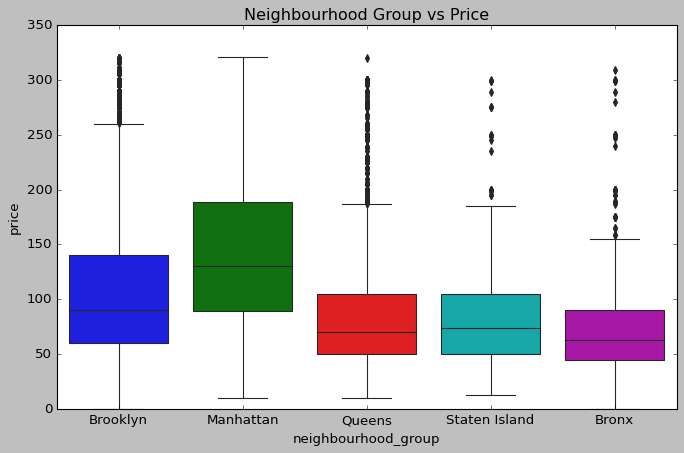

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
ax = axes.flatten()
sns.scatterplot(df_no_outlier.longitude,df_no_outlier.latitude,hue=df_no_outlier.neighbourhood_group, ax=ax[0])

#plt.figure(figsize=(20,10))
sns.scatterplot(df_no_outlier.longitude,df_no_outlier.latitude,hue=df_no_outlier.price, palette='Blues', ax=ax[1])
plt.ioff()

plt.style.use('classic')
plt.figure(figsize=(10,6))
plt.title("Neighbourhood Group vs Price")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = df_no_outlier)

plt.show()


# **7. Which room type is most popular and which are occupies the most?**

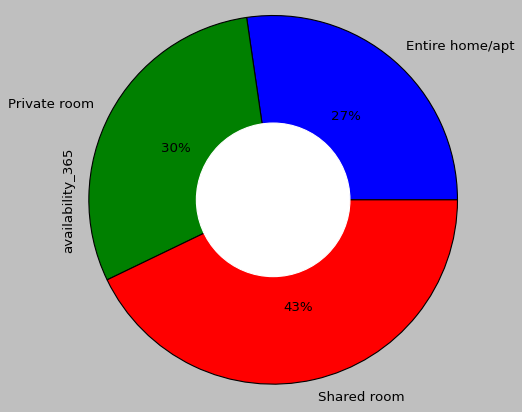

In [53]:
Popular_room = df_no_outlier.groupby(['room_type'])['availability_365'].mean()
Popular_room.plot(kind='pie',subplots=True,radius=1.2,autopct='%.0f%%')

my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)